In [92]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns

In [93]:
df = pd.read_csv("/Users/stuti/Downloads/432AE.csv")
df

,Longitude,Latitude,Speed,NW,RSRP,RSRQ,NODEHEX
0,-8.424987,51.918165,44,2 LTE,-106.0,-10.0,NaN
1,-8.424987,51.918165,44,2 LTE,-106.0,-10.0,NaN
2,-8.424987,51.918165,44,2 LTE,-110.0,-12.0,NaN
3,-8.424987,51.918165,44,2 LTE,-110.0,-12.0,NaN
4,-8.424987,51.918165,44,2 LTE,-107.0,-12.0,NaN
...,...,...,...,...,...,...,...
19333,NaN,NaN,,NaN,NaN,NaN,NaN
19334,NaN,NaN,,NaN,NaN,NaN,NaN
19335,NaN,NaN,,NaN,NaN,NaN,NaN
19336,NaN,NaN,,NaN,NaN,NaN,NaN


In [94]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338 entries, 0 to 19337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  2201 non-null   float64
 1   Latitude   2201 non-null   float64
 2   Speed      2304 non-null   object 
 3   NW         2201 non-null   object 
 4   RSRP       2201 non-null   float64
 5   RSRQ       2201 non-null   float64
 6   NODEHEX    0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 1.0+ MB
None


In [95]:
df.isnull().any()

Longitude    True
Latitude     True
Speed        True
NW           True
RSRP         True
RSRQ         True
NODEHEX      True
dtype: bool

In [96]:
print(df.isnull().sum())

Longitude    17137
Latitude     17137
Speed        17034
NW           17137
RSRP         17137
RSRQ         17137
NODEHEX      19338
dtype: int64


In [97]:
print(df["NW"].value_counts())

2 LTE    1883
3 LTE     318
Name: NW, dtype: int64


<AxesSubplot:xlabel='count', ylabel='NW'>

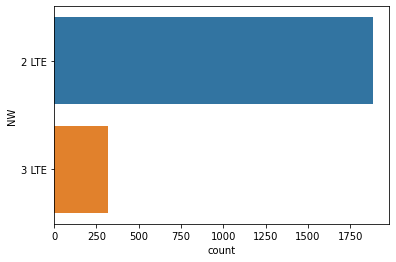

In [98]:
sns.countplot(y=df.iloc[:,3])

<AxesSubplot:>

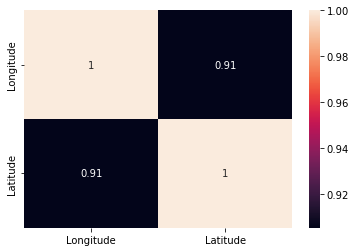

In [99]:
sns.heatmap(df.iloc[:,:4].corr(), annot=True)

In [100]:
df = df.drop_duplicates()

In [101]:
print(df["NW"].value_counts())

2 LTE    811
3 LTE    121
Name: NW, dtype: int64


In [102]:
#df.loc[:, 'NW'] = df['NW'].astype(float)

In [103]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['NW'] = le.fit_transform(df['NW'])

In [106]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the 'NW' column and transform the data
df.loc[:,'NW'] = le.fit_transform(df['NW'])


In [107]:
print(df["NW"].value_counts())

0    811
1    121
2      2
Name: NW, dtype: int64


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 19235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  932 non-null    float64
 1   Latitude   932 non-null    float64
 2   Speed      933 non-null    object 
 3   NW         934 non-null    int64  
 4   RSRP       932 non-null    float64
 5   RSRQ       932 non-null    float64
 6   NODEHEX    0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 58.4+ KB


In [123]:
# Replace empty strings with NaN
df.loc[:,'NW'] = df['NW'].replace('', np.nan)

# Convert 'NW' column to float
df.loc[:,'NW'] = df['NW'].astype(float)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df.drop("NW", axis=1)
y = df["NW"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [126]:
df.loc[:,'NW'] = df['NW'].astype(float)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: ''